In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Hugo's Portfolio/Realized Volatility Predictability through Neural Network and Financial Turbulence Research/New Version/Model 1/NASDAQ Realized Volatility.xlsx",index_col='Date',parse_dates=True)

In [ ]:
df.drop(columns=["US Financial Turbulence"], inplace=True)
df.head()

,Realised
Date,
2017-11-02,0.004994
2017-11-03,0.006088
2017-11-06,0.001982
2017-11-07,0.004198
2017-11-08,0.003317


# Hyperparameter Search

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
scaler = MinMaxScaler()

In [ ]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
epochs=[3,5,10,15]
dropouts=[0,0.2,0.4]
losses=['mse','mae','huber_loss']
RMSE = []
Accuracy = []

In [ ]:
from numpy.random import seed
from random import randrange

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 1
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/5
20/20 [==============================] - 6s 153ms/step - loss: 0.0669 - acc: 0.0000e+00
Epoch 2/5
20/20 [==============================] - 4s 193ms/step - loss: 0.0514 - acc: 0.0000e+00
Epoch 3/5
20/20 [==============================] - 3s 150ms/step - loss: 0.0491 - acc: 0.0000e+00
Epoch 4/5
20/20 [==============================] - 3s 147ms/step - loss: 0.0486 - acc: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 49ms/step
Epoch: 5 | Inputs: 126 | Nodes: 126 | Dropout: 0 | Loss: mae
RMSE: 0.0033662384986515364 | Accuracy: 61.47788029669794
Epoch 1/10
22/22 [==============================] - 5s 108ms/step - loss: 0.0045 - acc: 0.0000e+00
Epoch 2/10
22/22 [==============================] - 2s 106ms/step - loss: 0.0035 - acc: 0.0000e+00
Epoch 3/10
22/22 [==============================] - 2s 107ms/step - loss: 0.0032 - acc: 0.0000e+00
Epoch 4/10
22/22 [==============================] - 4s 160ms/step - loss: 0.0030 - acc: 0.0000e+00
Epoch 5/10
22/22 [=============

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 1
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/10
22/22 [==============================] - 3s 29ms/step - loss: 0.0669 - acc: 0.0000e+00
Epoch 2/10
22/22 [==============================] - 1s 30ms/step - loss: 0.0584 - acc: 0.0000e+00
Epoch 3/10
22/22 [==============================] - 1s 29ms/step - loss: 0.0542 - acc: 0.0000e+00
Epoch 4/10
22/22 [==============================] - 1s 29ms/step - loss: 0.0536 - acc: 0.0000e+00
Epoch 5/10
22/22 [==============================] - 1s 50ms/step - loss: 0.0529 - acc: 0.0000e+00
Epoch 6/10
22/22 [==============================] - 1s 41ms/step - loss: 0.0513 - acc: 0.0000e+00
Epoch 7/10
22/22 [==============================] - 1s 40ms/step - loss: 0.0500 - acc: 0.0000e+00
Epoch 8/10
22/22 [==============================] - 1s 43ms/step - loss: 0.0489 - acc: 0.0000e+00
Epoch 9/10
22/22 [==============================] - 1s 29ms/step - loss: 0.0501 - acc: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 37ms/step
Epoch: 10 | Inputs: 63 | Nodes: 14 | Dropout: 0.2 | Lo

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 1
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/3
22/22 [==============================] - 4s 56ms/step - loss: 0.0057 - acc: 0.0000e+00
Epoch 2/3
22/22 [==============================] - 1s 54ms/step - loss: 0.0041 - acc: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 0s 27ms/step
Epoch: 3 | Inputs: 63 | Nodes: 56 | Dropout: 0.4 | Loss: huber_loss
RMSE: 0.0035235212688572346 | Accuracy: 55.01898331801504
Epoch 1/10
16/16 [==============================] - 5s 118ms/step - loss: 0.0249 - acc: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 2s 104ms/step - loss: 0.0142 - acc: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 2s 98ms/step - loss: 0.0140 - acc: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 2s 104ms/step - loss: 0.0124 - acc: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 2s 95ms/step - loss: 0.0125 - acc: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 2s 105ms/step - loss: 0.0109 - acc: 0.0000e+00
Epoch 7/10
16/16 [========

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 1
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/15
20/20 [==============================] - 4s 82ms/step - loss: 0.0054 - acc: 0.0000e+00
Epoch 2/15
20/20 [==============================] - 3s 134ms/step - loss: 0.0040 - acc: 0.0000e+00
Epoch 3/15
20/20 [==============================] - 2s 77ms/step - loss: 0.0035 - acc: 0.0000e+00
Epoch 4/15
20/20 [==============================] - 2s 79ms/step - loss: 0.0033 - acc: 0.0000e+00
Epoch 5/15
20/20 [==============================] - 2s 77ms/step - loss: 0.0032 - acc: 0.0000e+00
Epoch 6/15
20/20 [==============================] - 2s 80ms/step - loss: 0.0031 - acc: 0.0000e+00
Epoch 7/15
20/20 [==============================] - 3s 129ms/step - loss: 0.0031 - acc: 0.0000e+00
Epoch 8/15
20/20 [==============================] - 2s 82ms/step - loss: 0.0030 - acc: 0.0000e+00
Epoch 9/15
20/20 [==============================] - 2s 76ms/step - loss: 0.0030 - acc: 0.0000e+00
Epoch 10/15
20/20 [==============================] - 2s 126ms/step - loss: 0.0029 - acc: 0.0000e+00
Epoch 11/15
20/2

Epoch: 10 | Inputs: 252 | Nodes: 42 | Dropout: 0.4 | Loss: mae
RMSE: 0.0033207173145965896 | Accuracy: 63.23568628266081

In [ ]:
RMSE = []
Accuracy = []

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.8)]
test = df.iloc[int(len(df['Realised'])*0.8):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.8)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 1
n_input = 252
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(42, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dropout(0.4))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=10)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(len(test)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)

Epoch 1/10
24/24 [==============================] - 6s 107ms/step - loss: 0.0756 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0756
Epoch 2/10
24/24 [==============================] - 2s 102ms/step - loss: 0.0576 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0576
Epoch 3/10
24/24 [==============================] - 2s 102ms/step - loss: 0.0538 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0538
Epoch 4/10
24/24 [==============================] - 3s 104ms/step - loss: 0.0513 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0513
Epoch 5/10
24/24 [==============================] - 4s 181ms/step - loss: 0.0495 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0495
Epoch 6/10
24/24 [==============================] - 2s 100ms/step - loss: 0.0505 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0505
Epoch 7/10
24/24 [==============================] - 2s 102ms/step - loss: 0.0501 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0501
Epoch 8/10
24/24 [==============================] - 2s 102ms/s

In [ ]:
RMSE

[0.004905428893121862,
 0.005115299419709046,
 0.005002426705541511,
 0.005045206700129851,
 0.004865899276435741,
 0.004846533963073031,
 0.0048017818052548,
 0.004942651143014049,
 0.004920205713975939,
 0.004908905459423056]

In [ ]:
Accuracy

[69.31496479441135,
 70.32471449156385,
 69.92179142609342,
 70.240499149876,
 69.53641412503602,
 69.57291320412054,
 68.97464674357778,
 70.27167412081863,
 69.87067052492894,
 69.43429495724203]

In [ ]:
df_for_date=df[int(len(df['Realised'])*0.8):].reset_index()

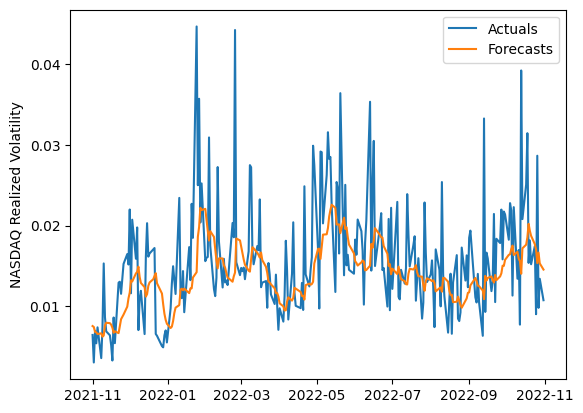

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

In [ ]:
forecasts=true_predictions

In [ ]:
my_df = {'Forecasts': forecasts.reshape(252)}
df = pd.DataFrame(my_df)
df.to_csv('Model 1 NASDAQ Forecasts.csv', index = True)